In [1]:
import requests
from IPython.core.display import HTML

# Activation functions and loss functions
This exercise is about activation- and loss functions for neural architectures. The architecture of an NN offers endless variations and customization possibilities for defining (families of) prediction functions, making it impractical to exhaustively test every possible option for a given problem. Consequently, developing an intuition of how different architectural choices, parameters, and hyperparameters impact the performance of the network is essential. 

**Important**
Most of the code is provided, with only a few adjustments left to complete, it is however important for you to reflect on the outcomes and **relate them to the theory**.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#activation">Task 1: Implement activation functions</a>
            </li>
            <li>
            <a href="#activation1">Task 2: Experiment with activation functions</a>
            </li>
            <li>
            <a href="#activation2">Task 3: Evaluate</a>
            </li>
            <li>
            <a href="#loss">Task 4: Implement loss functions</a>
            </li>
            <li>
            <a href="#loss1">Task 5: Visualizing loss functions</a>
            </li>
            <li>
            <a href="#loss2">Task 6: Experiment with loss functions</a>
            </li>
            <li>
            <a href="#loss3">Task 7: Evaluate</a>
            </li>
            <li>
            <a href="#loss4">Task 8: Custom loss functions</a>
            </li>
        </ul>
    </div>
</article>

## Activation Functions
This exercise is about the importance of selecting an appropriate activation function. Activation functions are crucial for introducing non-linearity into neural architectures. Each activation function has its unique characteristics and trade-offs and can significantly influence the model’s predictive capability, impacting its performance, convergence behavior, and the complexity of tasks it can effectively address.
This exercise explores activation functions for:
**Classification:**
- Sigmoid: Commonly used in binary classification tasks, the sigmoid function maps input values to a number between 0 and 1. However, it can suffer from so-called vanishing gradient problems, occurring in deeper networks.

- Hyperbolic Tangent (tanh): maps inputs to the range between -1 and 1 and addresses some of the shortcomings of the sigmoid function in terms of vanishing gradients.

- Softmax: is a generalization of the logistic function, commonly used for the output layer of multi-class classification networks, converting raw inputs into probabilities across multiple classes.


**Regression:**
- Rectified Linear Unit (ReLU): ReLU introduces non-linearity while maintaining computational efficiency. It helps mitigate vanishing gradient issues but may encounter "dead neurons" due to zero gradients for negative inputs.

- Leaky ReLU: addresses the "dying ReLU" problem by allowing a small, non-zero gradients for negative inputs, maintaining active neurons during training.

- Exponential Linear Unit (ELU): similar to ReLU for positive inputs, ELU applies an exponential function to negative values, ensuring smoother gradients and reducing the risk of “dead neurons” during trainin



---
**Task 1 (medium): Implement activation functions👩‍💻**
1. Use the `torch`
 library to implement the activation functions defined in the cell below. 


**Activation functions**
**Linear**

$$
f(x) = x
$$
**Sigmoid**

$$
f(x) = \frac{1}{1 + e^{-x}}
$$
**ReLU**

$$
f(x) = \max(0, x)
$$
**Leaky ReLU**

$$
f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0 
\end{cases}
$$
**Tanh**

$$
f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
**ELU**

$$
f(x) = \begin{cases} 
x & \text{for } x \geq 0 \\
\alpha \left( e^x - 1 \right) & \text{for } x < 0
\end{cases}
$$



---

In [5]:
import torch

def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def relu(x):
    return torch.clamp(x, min=0)

def leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, x, alpha * x)

def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

def elu(x, alpha=1.0):
    return torch.where(x >= 0, x, alpha * (torch.exp(x) - 1))


## Applying activation functions to neural networks
<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="make_moons">

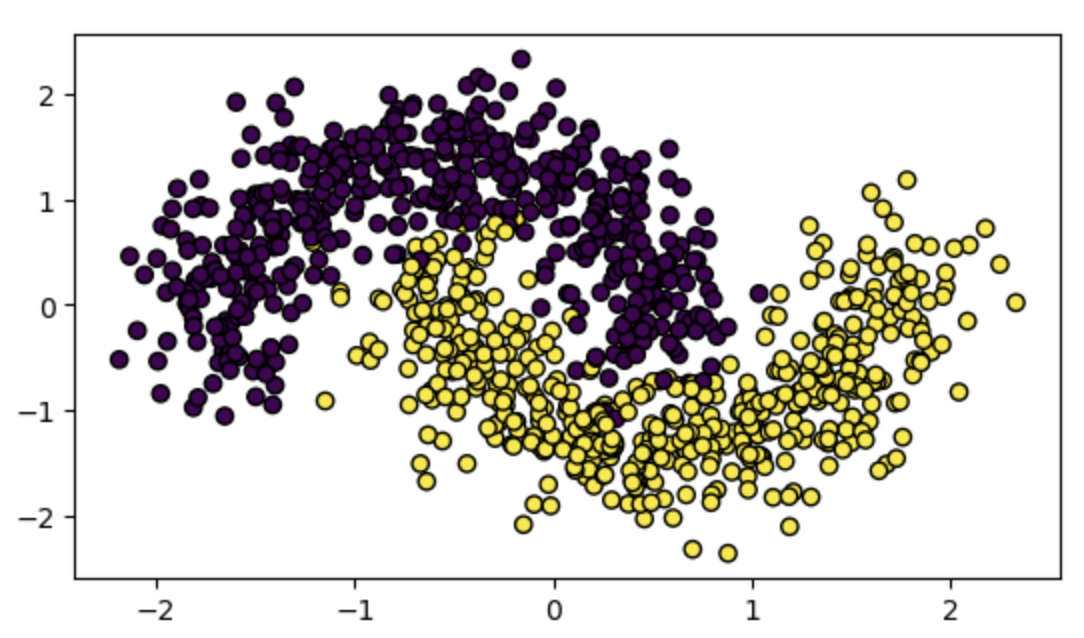

<figcaption class="figure-caption has-text-center">Figure 1: Example of the synthetic data generated by the `make_moons`
 function.
</figcaption>
</figure>
</div>


</div>

The `make_moons`
 function from the [Scikit-Learn Library](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
 is used to generate synthetic data. The function generates two classes to be separated as shown in [Figure 1](#make_moons). The following tasks will apply the activation functions for the classification problem to:
- train neural networks (NNs), 
- evaluate their effects on performance, focusing on accuracy, convergence speed, and computational efficiency.

The NN defined in the cell below uses functions and classes defined in the following files:
- `networks.py`
: Contains the `SimpleNN`
 network implementation.
- `trainers.py`
: contains the `train`
 function used for training.
- `metrics.py`
: contains the `evaluateNN`
 function for evaluation and visualization.


---
**Task 2 (medium): Experiment with activation functions👩‍💻**
1. Examine the files and gain an overview of the architecture of the NN and the training loop. 

2. Run the cell below to train and visualize the performance of the models with the different activations functions.



---

c:\Users\jgrum\.conda\envs\iml\lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


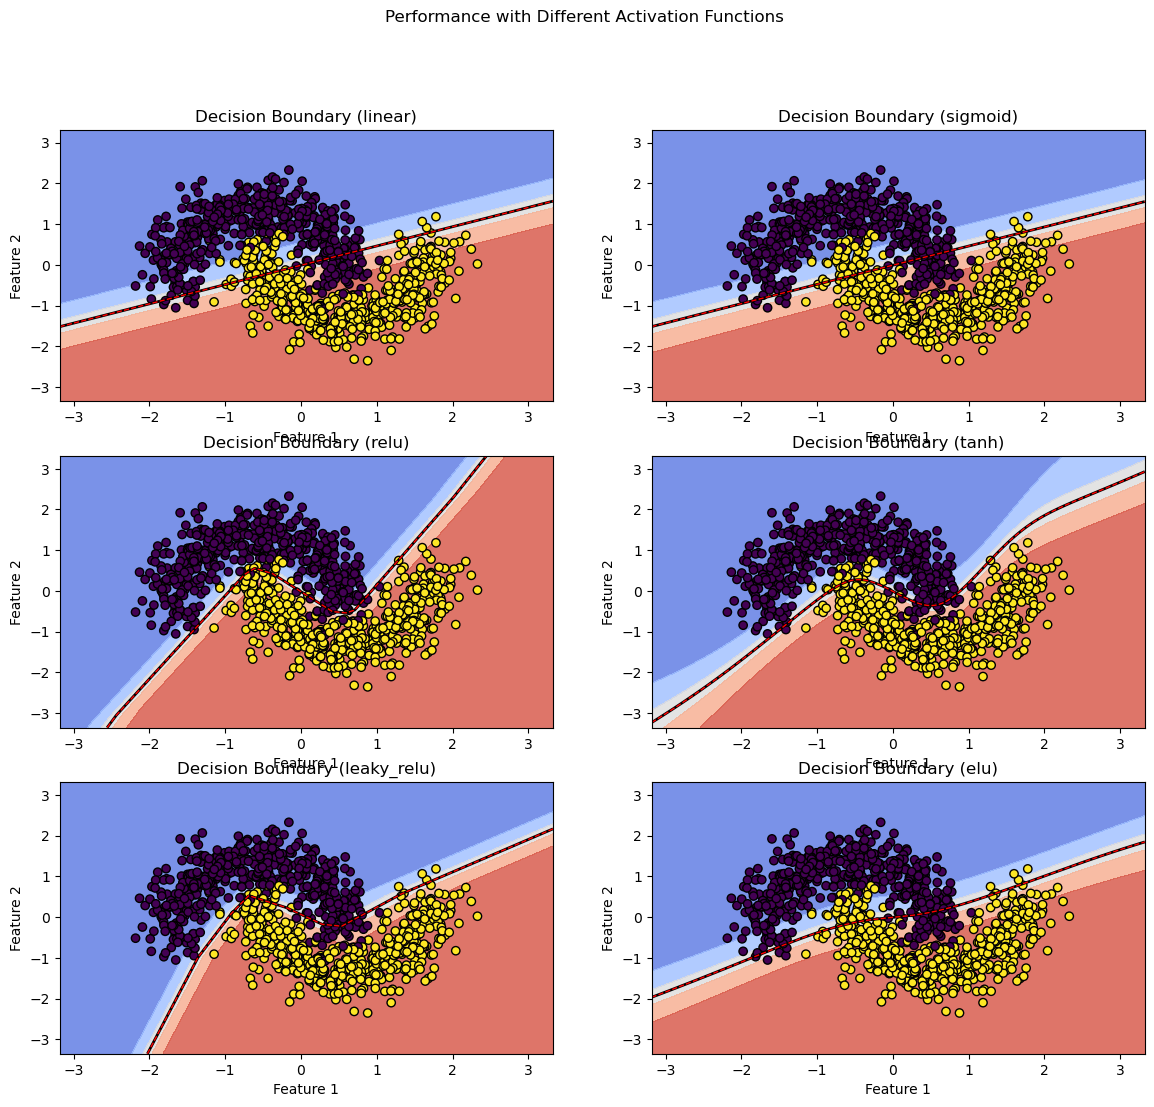

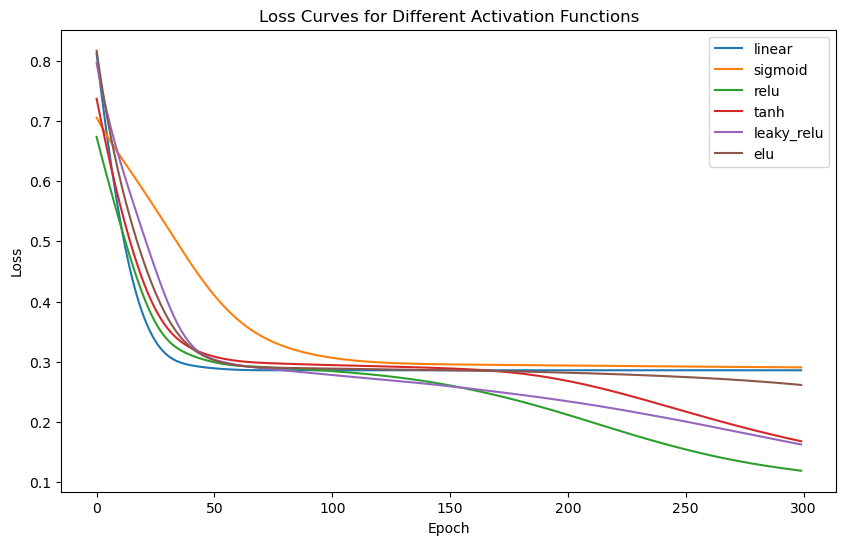

Activation: linear, Test Accuracy: 0.86, Training Time: 0.74 seconds
Activation: sigmoid, Test Accuracy: 0.86, Training Time: 0.25 seconds
Activation: relu, Test Accuracy: 0.97, Training Time: 0.18 seconds
Activation: tanh, Test Accuracy: 0.94, Training Time: 0.16 seconds
Activation: leaky_relu, Test Accuracy: 0.95, Training Time: 0.14 seconds
Activation: elu, Test Accuracy: 0.89, Training Time: 0.12 seconds


In [6]:
from torch import optim
from torchvision import transforms
from trainers import *
from networks import *
from metrics import *

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor,X_train, X_test, y_train, y_test, X, y  = get_data()
# Activation functions to test
activation_functions = {
    'linear': linear,
    'sigmoid': sigmoid,
    'relu': relu,
    'tanh': tanh,
    'leaky_relu': leaky_relu,
    'elu': elu
}

results = {}

for name, activation in activation_functions.items():
    model, train_losses, accuracy, training_time, decision_threshold = train(SimpleNN(activation=activation), name, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, X_train, X_test, y_train, y_test, epoch=300 )
    # Store results
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'accuracy': accuracy,
        'training_time': training_time
    }

evaluateNN(results, X, y)


---
**Task 3 (medium): Evaluate👩‍💻💡**
1. Evaluate the performance of the models based on the activation functions used. Analyze the results using the plots and relate them to theoretical concepts to interpret the outcomes.
2. Evaluate the activation functions in terms of computational efficiency and their suitability for the given problem. Explain which activation function is preferred and justify the choice.
3. Rerun the experiment by increasing the number of epochs to 1000. Investigate the training curves and analyze the results. Discuss why some activation functions cause the learning  to plateau before eventually converging to a smaller loss?


---

## Task 3 Reflections

**Performance of models based on activation functions**

**Activation function: Computational efficiency and suitability**

**With 1000 epochs, instead of 300**


Theoretical Interpretation:

Linear Activation:
Nature: Does not introduce non-linearity.
Impact: Model behaves like a linear classifier.
Result: Limited ability to capture complex patterns, leading to lower accuracy.

Sigmoid Activation:
Nature: Maps inputs to the range (0, 1).
Issues:
Vanishing Gradient Problem: Gradients diminish for large input magnitudes.
Result: Slower learning and lower accuracy due to inefficient gradient flow.

ReLU Activation:
Nature: Outputs zero for negative inputs and linear for positive inputs.
Advantages:
Computational Efficiency: Simple and fast computations.
Mitigates Vanishing Gradient: Maintains gradients for positive inputs.
Result: Highest test accuracy due to effective learning of non-linear relationships.

Tanh Activation:
Nature: Maps inputs to the range (-1, 1).
Advantages:
Zero-Centered Output: May lead to faster convergence.
Issues:
Vanishing Gradient: Similar issues as Sigmoid in saturation regions.
Result: Good performance with high accuracy.

Leaky ReLU Activation:
Nature: Allows a small, non-zero gradient for negative inputs.
Advantages:
Addresses Dying ReLU Problem: Keeps neurons active.
Result: High accuracy, slightly below ReLU.

ELU Activation:
Nature: Exponential behavior for negative inputs.
Advantages:
Smoother Gradient Transition: May help in certain cases.
Result: Moderate accuracy with the shortest training time.

## Loss Functions
The loss function evaluates how closely the model’s predictions match the true labels and guides the adjustment of model parameters during training. Different types of problems require specific loss functions. Therefore, understanding the data and the problem is crucial for selecting or designing the most suitable loss function for training the network.
This exercise explores the impact of the following loss functions:
**Classification**
- Binary Cross Entropy (BCE)

**Regression**
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)


---
**Task 4 (medium): Implement loss functions👩‍💻**
1. Implement the loss functions defined below using the `torch`
 library.


**Loss functions**
Let:
- $ y_i $ be the true value of the $i$-th sample in the training set, 
- $ N $ be the number of samples.

Define:
**Mean Squared Error (MSE)**

$$
\text{MSE}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
where $ \hat{y}_i $ is the predicted value of the $i$-th sample in the training set.
**Mean Absolute Error**

$$
\text{MAE}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$
where $ \hat{y}_i $ is the predicted value of the $i$-th sample in the training set.. 
**Binary Cross-Entropy Loss (BCE)**

$$
\text{BCE}(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$
where $ \hat{y}_i $ is the predicted probability of the $i$-th sample in the training set.


---

In [7]:
# Custom Binary Cross-Entropy Loss Function
class BCE_Loss(nn.Module):
    def __init__(self):
        super(BCE_Loss, self).__init__()

    def forward(self, outputs, targets):
        epsilon = 1e-12
        outputs = torch.clamp(outputs, min=epsilon, max=1 - epsilon)
        bce = - (targets * torch.log(outputs) + (1 - targets) * torch.log(1 - outputs))
        return bce.mean()

# Custom Mean Squared Error Loss Function
class MSE_Loss(nn.Module):
    def __init__(self):
        super(MSE_Loss, self).__init__()

    def forward(self, outputs, targets):
        return ((outputs - targets) ** 2).mean()

# Custom Mean Absolute Error Loss Function
class MAE_Loss(nn.Module):
    def __init__(self):
        super(MAE_Loss, self).__init__()

    def forward(self, outputs, targets):
        return torch.abs(outputs - targets).mean()



---
**Task 5 (medium): Visualizing loss functions👩‍💻**
1. Complete the cell below to visualize the  `BCE`
, `MSE`
 and `MAE`
 loss functions when applied to a synthetic binary classification problem. Use the implemented loss functions, the true labels and the `linspace`
 in a for loop, to plot the loss functions.
2. Use the plots and the definitions of the loss functions to argue why `BCE`
 is preferred for classification problems. 


---

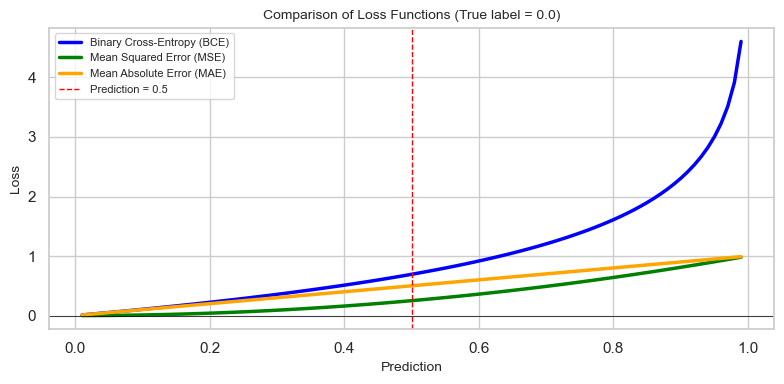

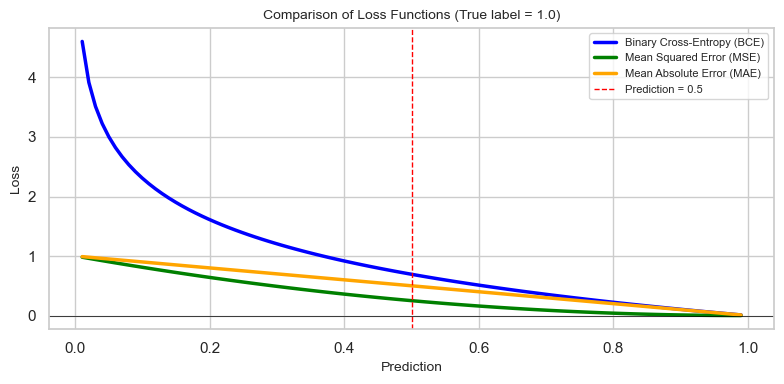

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the loss functions
bce_loss = BCE_Loss()
mse_loss = MSE_Loss()
mae_loss = MAE_Loss()

# True labels to consider
y_true_values = [0.0, 1.0]  # True labels 0 and 1

# Range of predictions
predictions = torch.linspace(0.01, 0.99, 100).unsqueeze(1)  # Reshape to match expected input shape

# Set Seaborn style
sns.set(style="whitegrid")

for y_true_value in y_true_values:
    y_true = torch.full_like(predictions, y_true_value)  # Broadcast y_true to match predictions
    
    # Compute loss values
    bce_values = [bce_loss(torch.tensor([p]), torch.tensor([y_true_value])).item() for p in predictions]
    mse_values = [mse_loss(torch.tensor([p]), torch.tensor([y_true_value])).item() for p in predictions]
    mae_values = [mae_loss(torch.tensor([p]), torch.tensor([y_true_value])).item() for p in predictions]
    
    # Create a DataFrame for plotting
    import pandas as pd
    data = pd.DataFrame({
        'Prediction': predictions.squeeze().numpy(),
        'Binary Cross-Entropy (BCE)': bce_values,
        'Mean Squared Error (MSE)': mse_values,
        'Mean Absolute Error (MAE)': mae_values
    })

    # Plot the loss functions
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=data, x='Prediction', y='Binary Cross-Entropy (BCE)', color='blue', label='Binary Cross-Entropy (BCE)', linewidth=2.5)
    sns.lineplot(data=data, x='Prediction', y='Mean Squared Error (MSE)', color='green', label='Mean Squared Error (MSE)', linewidth=2.5)
    sns.lineplot(data=data, x='Prediction', y='Mean Absolute Error (MAE)', color='orange', label='Mean Absolute Error (MAE)', linewidth=2.5)

    # Add labels, title, and legend
    plt.title(f'Comparison of Loss Functions (True label = {y_true_value})', fontsize=10)
    plt.xlabel('Prediction', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0.5, color='red', linestyle='--', linewidth=1.0, label='Prediction = 0.5')
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Task 5 reflection

**Use the plots and the definitions of the loss functions to argue why `BCE` is preferred for classification problems.** 

BCE uses propabilities. Punishing predictions far off, meaning:
Label is 1, prediction is 0.9, loss is =
label is 1, prediction is 0.1, loss is =

MAE/MSE just uses raw values.

The next step is about using the loss functions for training a neural network on the same classification task as before and to show the impact of the loss functions on performance metrics, such as accuracy, precision, recall and F1 score.
For this task, the `evaluateNN2`
 function in the `metrics.py`
 file will be used. Note the noise parameter in the `get_data`
 function and the `decision_threshold`
 in the `train`
 function.

---
**Task 6 (medium): Experiment with loss functions💡**
1. Run the cell below to train and visualize the performance of the network with the different loss functions.
2. Compare the results to the previous tasks and relate them to theory. 


---

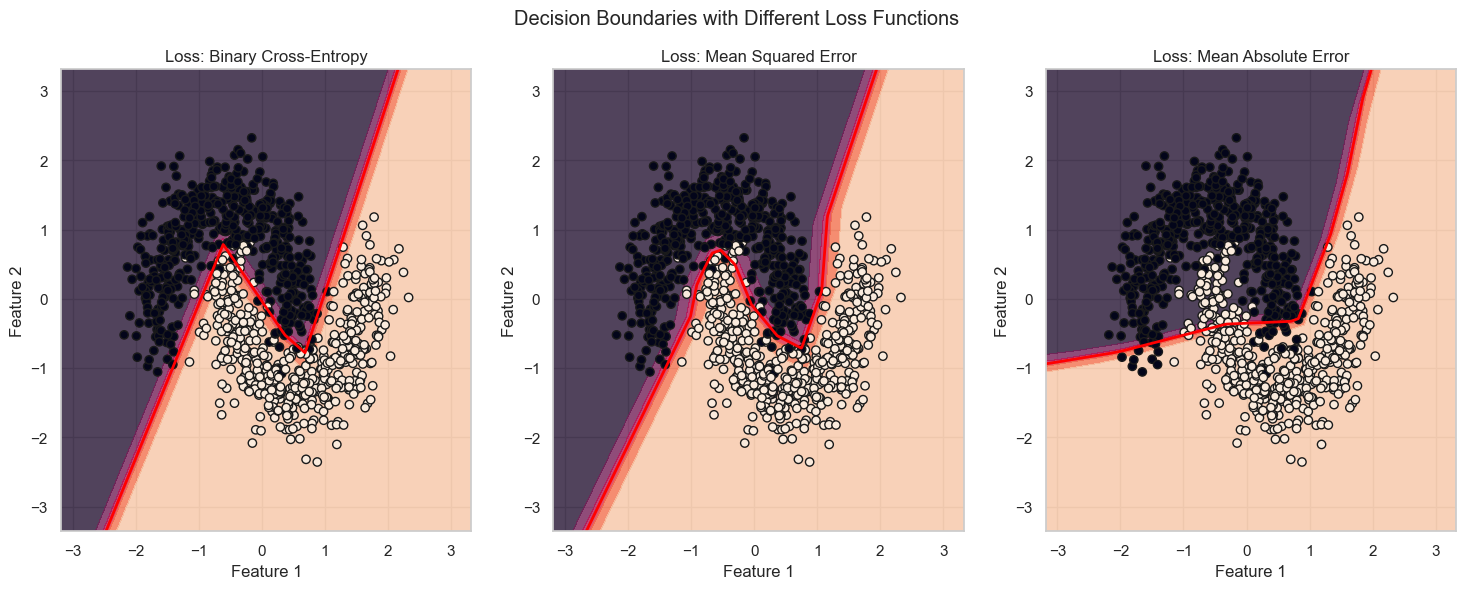

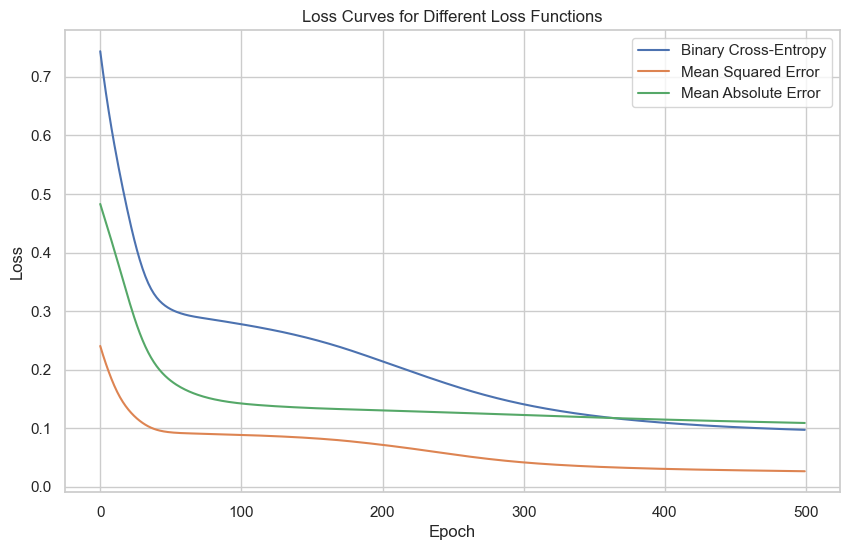

Loss: Binary Cross-Entropy, Test Accuracy: 0.93, Precision: 0.88, Recall: 1.00, F1 Score: 0.93
Loss: Mean Squared Error, Test Accuracy: 0.90, Precision: 0.83, Recall: 1.00, F1 Score: 0.91
Loss: Mean Absolute Error, Test Accuracy: 0.88, Precision: 0.89, Recall: 0.86, F1 Score: 0.87


In [15]:
from torch import optim
from torchvision import transforms
from trainers import *
from networks import *
from metrics import *


X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor,X_train, X_test, y_train, y_test, X, y  = get_data(0.2)

# Define loss functions to test
loss_functions = {
    'Binary Cross-Entropy': BCE_Loss(),
    'Mean Squared Error': MSE_Loss(),
    'Mean Absolute Error': MAE_Loss()
}

results = {}

for name, loss in loss_functions.items():
    model, train_losses, accuracy, training_time, decision_threshold = train(SimpleNN(activation=relu), name, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, X_train, X_test, y_train, y_test, 500, loss=loss, decision_threshold=0.1 )
    # Store results
    results[name] = {
        'model': model,
        'train_losses': train_losses,
        'accuracy': accuracy,
        'training_time': training_time,
        'decision_threshold': decision_threshold
    }

evaluateNN2(results, X, y, X_test_tensor, y_test)


---
**Task 7 (medium): Evaluate💡**
1. Use the plots to evaluate the performance of the different loss functions and incorporate theoretical concepts to interpret the results.

2. Explain why MSE and MAE losses may achieve lower final loss values, while BCE delivers comparable or superior accuracy for the classification task. Discuss the distinct characteristics of each loss function and how they relate to classification performance.

3. Experiment with the noise parameter and explain its impact on accuracy. Relate your explanation to the findings from [Task 5](#loss1).

4. Modify the decision threshold and analyze its impact on the results. Address the following questions:
    - Explain a scenario where increasing the threshold might be beneficial, and support the reasoning with theory.
    - Explain a scenario where decreasing the threshold might be advantageous, and provide a theoretical justification.




---

## Task 7 reflection


## 1. Performance Evaluation Using Plots

From the decision boundary plots:
- **Binary Cross-Entropy (BCE)**:
  - Produces the most appropriate decision boundary for classification, effectively separating the two classes.
  - Handles the sharp boundary transitions well, aligning with the theoretical advantage of BCE in binary classification.

- **Mean Squared Error (MSE)**:
  - The decision boundary is less well-defined and appears smoother.
  - This aligns with MSE's tendency to treat outputs as continuous values, which is suboptimal for binary classification.

- **Mean Absolute Error (MAE)**:
  - The decision boundary is slightly better than MSE but still less precise than BCE.
  - Its linear nature leads to less sensitivity to confidence levels, causing less sharp boundaries.

From the loss curves:
- **BCE Loss** starts higher but converges more effectively for classification, even if its final loss value isn't the smallest.
- **MSE and MAE Losses** achieve lower final loss values but at the expense of classification performance (lower accuracy and F1 scores).

### Metrics Comparison:
| Loss Function         | Test Accuracy | Precision | Recall | F1 Score |
|-----------------------|---------------|-----------|--------|----------|
| **Binary Cross-Entropy** | **0.93**      | 0.88      | 1.00   | **0.93** |
| **Mean Squared Error**  | 0.90          | 0.83      | 1.00   | 0.91     |
| **Mean Absolute Error** | 0.88          | 0.89      | 0.86   | 0.87     |

## 2. Why BCE Outperforms MSE and MAE

### Binary Cross-Entropy (BCE):
- **Probabilistic Framework**:
  - Designed for classification tasks, BCE directly minimizes the log-loss.
  - Penalizes incorrect predictions more sharply, especially those made with high confidence.
- **Decision Boundary**:
  - Produces sharp, well-defined boundaries, leading to higher accuracy, precision, recall, and F1 score.
- **Final Loss Values**:
  - BCE does not aim for the smallest numeric loss value but instead optimizes classification performance.

### Mean Squared Error (MSE):
- **Nature**:
  - Treats the output as continuous, penalizing squared differences between predictions and true labels.
- **Challenges in Classification**:
  - Over-penalizes confident predictions far from the true label (e.g., predicting 0.01 instead of 1.0), leading to suboptimal decision boundaries.
  - Focuses on minimizing error magnitude rather than classification probability, which impacts accuracy.

### Mean Absolute Error (MAE):
- **Nature**:
  - Penalizes errors linearly, resulting in less sensitivity to confidence levels.
- **Challenges in Classification**:
  - Does not emphasize confident incorrect predictions, leading to less sharp decision boundaries.

### Summary:
- **BCE** achieves superior performance because it optimizes for classification probability, while MSE and MAE focus on minimizing numeric error.

## 3. Impact of Noise on Accuracy

- **Observation**:
  - Increasing the noise parameter reduces accuracy for all loss functions.
  - Decision boundaries become less sharp, and the model struggles to separate classes effectively.
- **Theoretical Explanation**:
  - Noise increases overlap between classes, making it harder for the model to learn clear boundaries.
  - BCE handles noise better due to its probabilistic nature, which adjusts predictions based on confidence.
- **Relation to Task 5**:
  - As seen in the loss function plots, BCE is more sensitive to classification probabilities, allowing it to manage noisy data better than MSE or MAE.

## 4. Impact of Decision Threshold on Results

### Increasing the Threshold:
- **Scenario**:
  - Useful when **precision** is more important than recall.
  - Example: In medical diagnostics, avoiding false positives (e.g., diagnosing a healthy patient as sick) is critical.
- **Theoretical Justification**:
  - A higher threshold increases the confidence required for a positive prediction, reducing false positives but potentially increasing false negatives.

### Decreasing the Threshold:
- **Scenario**:
  - Beneficial when **recall** is more important than precision.
  - Example: In spam detection, catching all spam emails (even with some false positives) is more critical than missing spam.
- **Theoretical Justification**:
  - A lower threshold increases the model's sensitivity, reducing false negatives but potentially increasing false positives.

## Summary of Observations:
- **BCE**:
  - Best suited for classification tasks.
  - Performs well even with noise and varying thresholds.
- **MSE and MAE**:
  - More sensitive to noise and less effective for sharp decision boundaries.
- **Threshold Tuning**:
  - Should be guided by the trade-off between precision and recall, depending on the application.



---
**Task 8 (hard): Custom loss functions💡**
Consider the case of iris codes derived from an individual’s iris pattern. The codes are represented as binary vectors which is matched against a database of authorized codes to determine access. The Hamming Distance (HD) is commonly used as a similarity measure.

$$
HD(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} 
\begin{cases} 
1 & \text{if } x_i \neq y_i \\
0 & \text{if } x_i = y_i 
\end{cases}
$$
It calculates the number of positions with different values.
A neural network could potentially be trained to generate synthetic eye images embedding specific iris codes, potentially to gain unauthorized access to a system. It may seem logical to design a custom loss function based on the Hamming Distance, encouraging the network to generate patterns closely matching a target iris code. However, this approach is not valid for a loss function in the context of neural network training.
1. Argue why the HD is not a valid choice as loss function.


**Hint**
Incoorporate the formula of the HD and the nature of Gradient Decent in your discussion.


---

## Task 8: Why Hamming Distance is Not a Valid Loss Function

## Understanding the Hamming Distance (HD)

The Hamming Distance (HD) is defined as:
$$
HD(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} 
\begin{cases} 
1 & \text{if } x_i \neq y_i \\ 
0 & \text{if } x_i = y_i 
\end{cases}
$$

### Key Characteristics:
1. **Discrete Nature**:
   - The HD operates on binary values and simply counts the number of differing positions between two binary vectors.
   - This means HD produces integer values, not continuous gradients.

2. **Piecewise Constant**:
   - For any two binary vectors, the HD is a stepwise function. A single change in a binary position either increases or decreases the distance by 1.
   - HD lacks a continuous relationship between its input and output.

---

## Why HD is Not a Valid Loss Function

### 1. No Gradients for Backpropagation

- Neural network training relies on **Gradient Descent**, which adjusts the model's parameters by computing the derivative (gradient) of the loss function with respect to the model's predictions.
- The HD function is **not differentiable**:
  - It is binary and stepwise in nature, so it does not provide continuous gradients.
  - For example, flipping a single binary value leads to a discrete change in HD, but there is no way to compute a gradient to guide parameter updates.

### 2. Binary Inputs Clash with Neural Network Outputs

- Neural networks typically produce **continuous outputs** (e.g., probabilities in the range [0, 1]).
- To use HD, the outputs would need to be binarized (e.g., 0 or 1). However:
  - Binarization introduces non-differentiable steps, preventing the flow of gradients.
  - For instance, a sigmoid activation function would be used to approximate binary outputs, but the HD metric is incompatible with the smooth transition of probabilities to binary values.

### 3. Lack of Optimization Guidance

- HD provides no meaningful information on how close the predictions are to the target:
  - It only indicates whether two positions are the same or different, offering no feedback on how to improve the prediction.
  - For example, predicting 0.49 instead of 0.51 (in a sigmoid output) would yield the same HD value, despite being very close.

### 4. Non-Continuous Objective

- Loss functions like Binary Cross-Entropy (BCE) or Mean Squared Error (MSE) provide a **continuous and smooth optimization objective**, allowing gradient descent to iteratively reduce the error.
- HD, being non-continuous, would lead to unpredictable jumps in optimization or even prevent convergence.

---

## Alternative Approach

### Smooth Approximations
To incorporate the idea of HD, one could design a smooth, differentiable surrogate loss function:
- For example, use **BCE Loss** or **Mean Squared Error** to approximate binary outputs, ensuring compatibility with gradient descent.
- Alternatively, design a custom differentiable loss function that minimizes the difference between predicted probabilities and binary target codes without relying on hard binary values.

---

## Summary

The Hamming Distance is not a valid loss function because:
1. It is non-differentiable and does not produce gradients, which are essential for backpropagation.
2. It operates on binary values, which are incompatible with the continuous outputs of neural networks.
3. It provides no meaningful feedback for optimization, as it only counts mismatches without guiding how to reduce errors.

For neural network training, continuous and differentiable loss functions like **BCE** or **MSE** are required to ensure proper optimization through gradient descent.
